<a href="https://colab.research.google.com/github/Sricharan19/intern-pe-projects/blob/main/intern_pe_task_2_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [414]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn. compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn. metrics import r2_score
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('ggplot')




In [415]:
df = pd.read_csv("quikr_car.csv", encoding='latin-1')



In [416]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [417]:
df.shape

(892, 6)

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


problems with data

- change the datatype on year
-year does not have year value
-price change datatype
-remove strings from price
-kms driven change datatype
-fuel remove nan
-remove nan, kms
-name inconsistent change to short name

cleaning

In [419]:
backup=df.copy()

In [420]:
#removing unwanted value from year column and keeping only numerical vlaue
df=df[df['year'].str.isnumeric()]
df.shape

(842, 6)

In [421]:
#changing data type or year column
df['year']=df['year'].astype(int)
df.shape

(842, 6)

In [422]:
#price only numeric
df=df[df['Price']!='Ask For Price']
df['Price']=df['Price'].str.replace(',','').astype(int)
df.shape

<ipython-input-422-151243346d9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price'].str.replace(',','').astype(int)


(819, 6)

In [423]:
df.shape

(819, 6)

In [424]:
#removing unit and ','
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')
df.shape

<ipython-input-424-5d2bf946924e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')


(819, 6)

In [425]:


# Drop rows with missing values in the 'kms_driven' column
df = df.dropna(subset=['kms_driven'])

# Filter rows based on 'kms_driven' being numeric
df = df[df['kms_driven'].str.isnumeric()]
df.shape



(817, 6)

In [426]:
#changing datatype
df['kms_driven']=df['kms_driven'].astype(int)
df.shape

(817, 6)

In [427]:
#keeping only not null values
df=df[~df['fuel_type'].isna()]
df.shape

(816, 6)

In [428]:
#keeping first 3 words
df['name']=df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')
df.shape

(816, 6)

In [429]:
#resetting the index
df=df.reset_index(drop=True)

In [430]:
df.shape


(816, 6)

In [431]:
df.sample(20)

,name,company,year,Price,kms_driven,fuel_type
719,Mahindra KUV100 K8,Mahindra,2018,560000,8000,Diesel
66,Maruti Suzuki Stingray,Maruti,2015,315000,30000,Petrol
29,Mahindra Scorpio S10,Mahindra,2015,250000,48508,Diesel
143,Nissan Sunny,Nissan,2012,224999,45000,Petrol
339,Datsun Redi GO,Datsun,2017,244999,22000,Petrol
732,Hyundai Grand i10,Hyundai,2014,320000,41000,Petrol
405,Mahindra TUV300 T8,Mahindra,2018,1000000,4500,Diesel
408,Maruti Suzuki Alto,Maruti,2015,230000,5000,Petrol
47,Mitsubishi Pajero Sport,Mitsubishi,2015,1475000,47000,Diesel
201,Renault Scala RxL,Renault,2015,375000,25000,Diesel


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [433]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [434]:
#removing outliers value
df=df[df['Price']<6e6].reset_index(drop=True)

In [435]:
new_df=df.to_csv('carDataset.csv')

In [436]:
#splitting features and target for model train
X=df[['name','company','year','kms_driven','fuel_type']]
y=df['Price']

In [437]:
#training the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [438]:

# Encoding categorical columns
ohe = OneHotEncoder()
ohe.fit(X[['name', 'company', 'fuel_type']])


OneHotEncoder()

In [439]:
#column transformer
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [440]:
#using linear regression
lr=LinearRegression()

In [441]:
#creating pipeline
pipe=make_pipeline(column_trans,lr)

In [442]:
#fitting the data to machine
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [443]:
#predict the model
y_pred=pipe.predict(X_test)

In [444]:
#checking r2 score
r2_score(y_test,y_pred)

0.7709118030438922

In [445]:
# calculating random_state value which gives max accuracy
scores=[]
for i in range(1000):

   X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
   lr=LinearRegression()
   pipe=make_pipeline(column_trans,lr)
   pipe.fit (X_train,y_train)
   y_pred=pipe.predict (X_test)
   scores.append(r2_score(y_test,y_pred))

In [446]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([430382.81414542])

In [447]:
np.argmax(scores)

302

In [448]:
scores[np.argmax(scores)]

0.8991190499074018

In [449]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8991190499074018

In [450]:
import pickle

In [451]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [452]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456549.33356479])

In [453]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese

In [454]:
X=df[['name','company','year','kms_driven','fuel_type']]
y=df['Price']

In [455]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


**checking relationship of company with price**

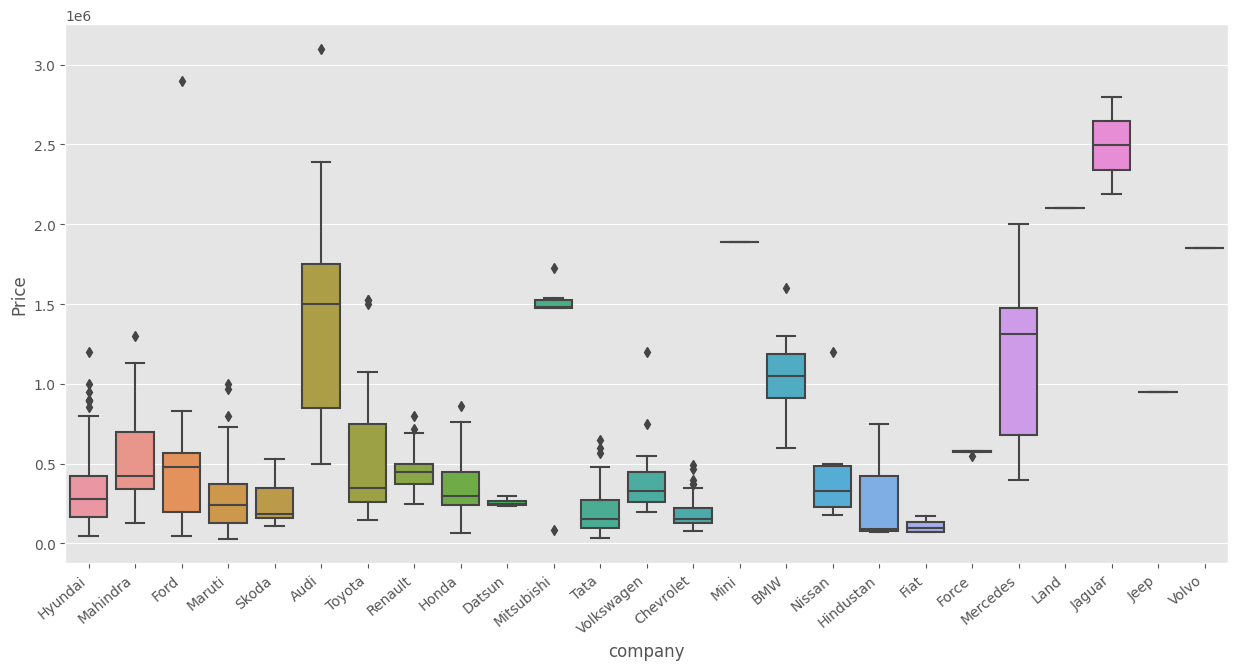

In [457]:
import seaborn as sns
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

**checking relationship of year with price**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.7% of the points cannot be placed

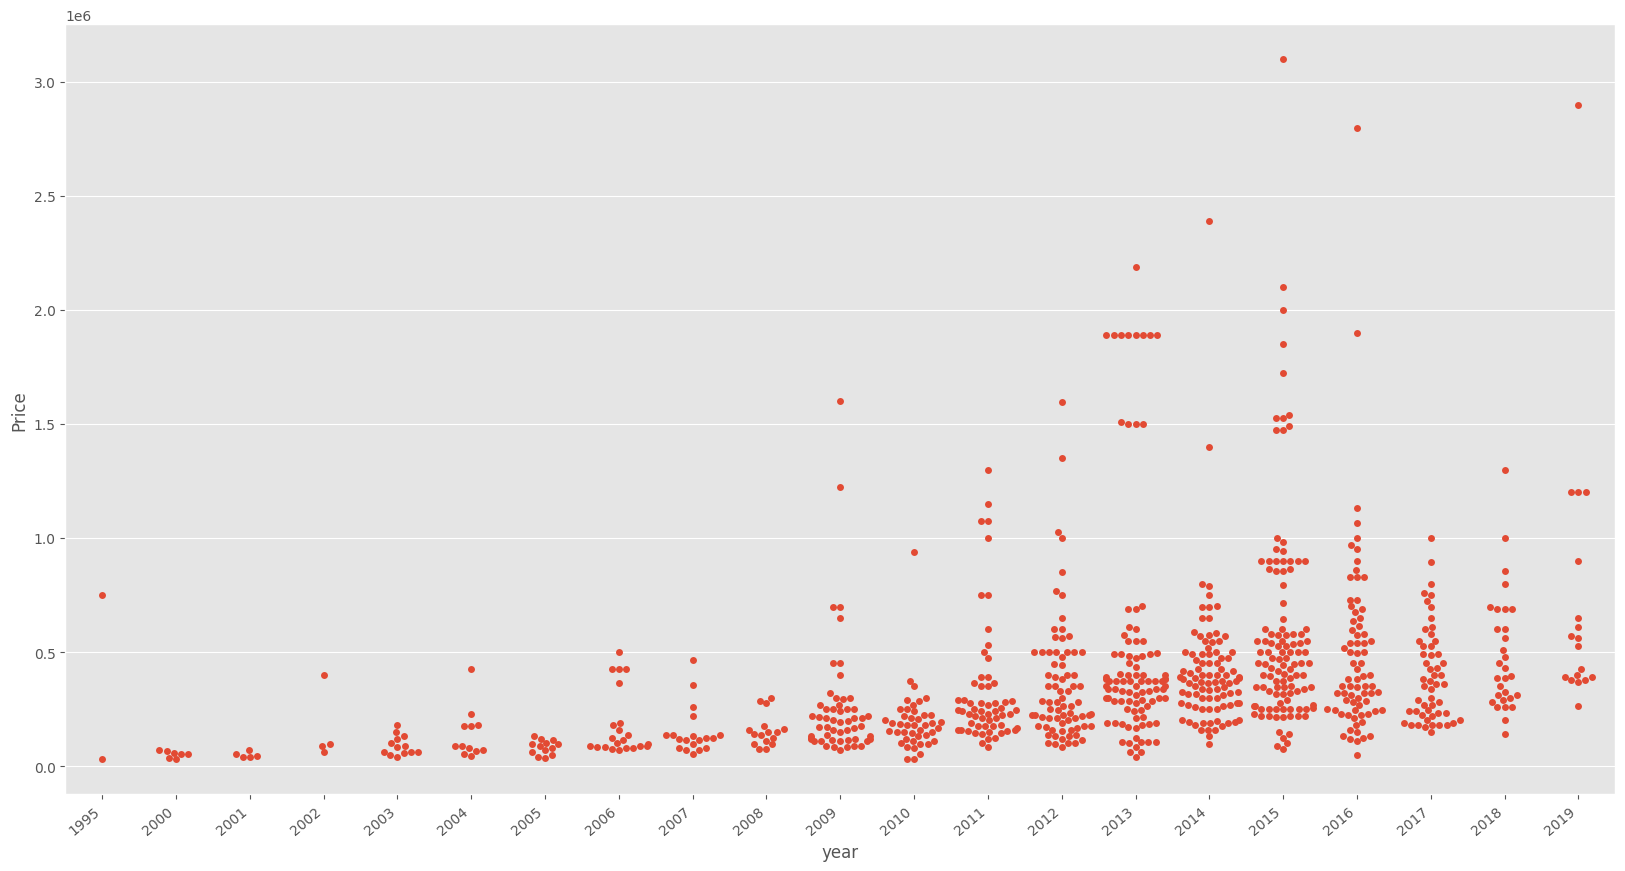

In [460]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

**checking relationship of kms_driven with price**

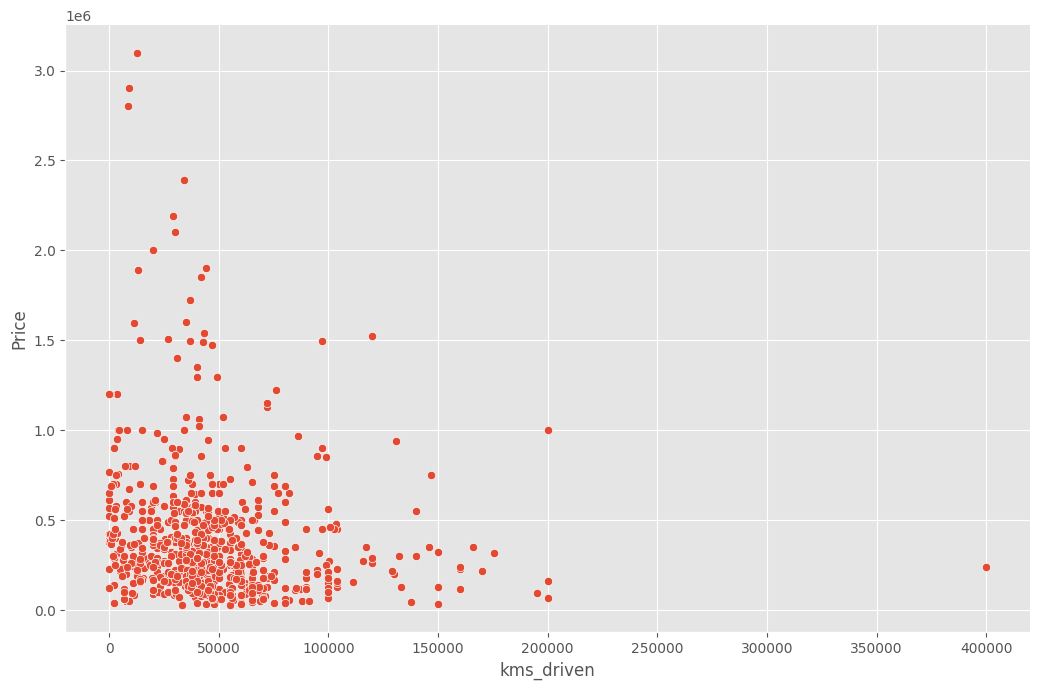

In [462]:
sns.relplot(x='kms_driven',y='Price',data=df,height=7,aspect=1.5)

**checking relationship of fuel type with price**

<Axes: xlabel='fuel_type', ylabel='Price'>

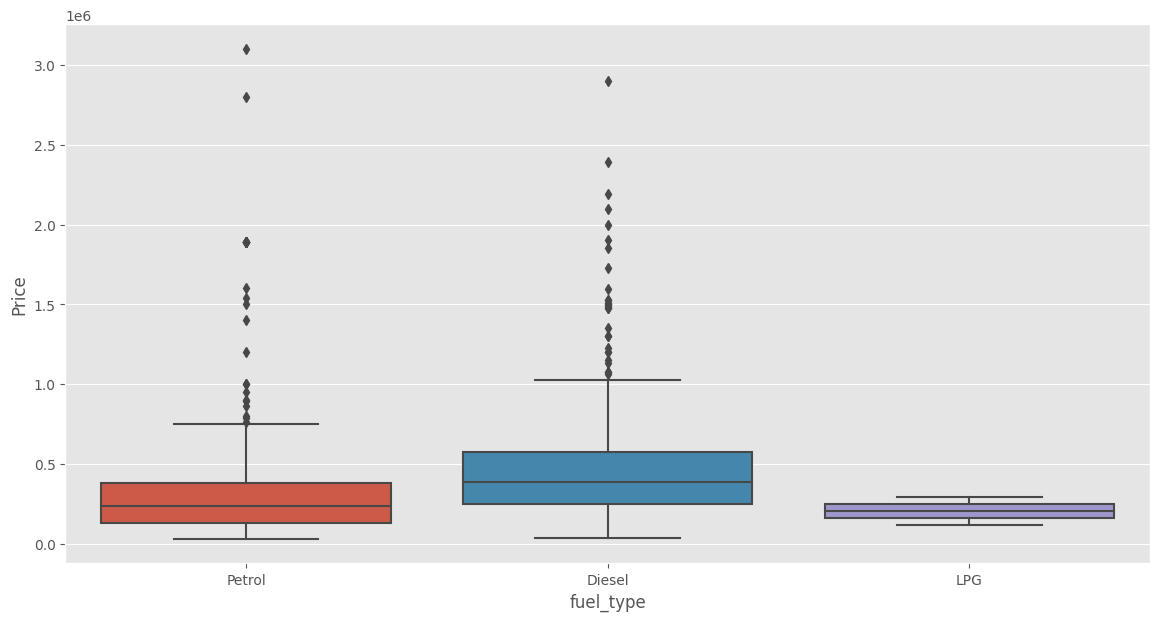

In [464]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=df)